/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:37:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}

Matriz de confusión:
 [[50838     1]
 [    4 29157]]

Reporte de clasificación:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00     50839
        True       1.00      1.00      1.00     29161

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000



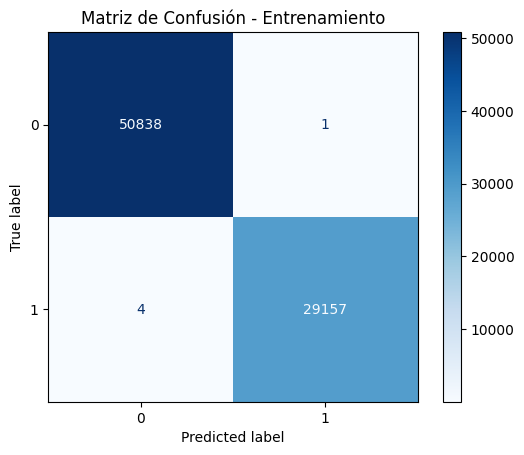

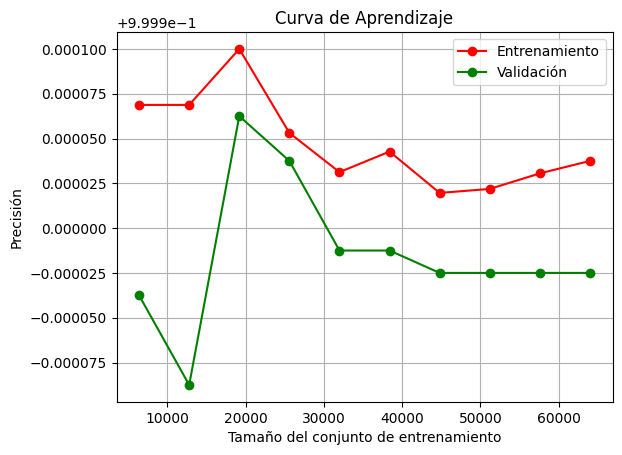

['xgboost_model.pkl']

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib

X_train = pd.read_csv('X_train_preprocessed.csv')
y_train = pd.read_csv('y_train.csv')

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid = {'n_estimators': [100, 200],'max_depth': [3, 6, 10],'learning_rate': [0.01, 0.1, 0.2],'subsample': [0.5, 0.8, 1.0]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train.values.ravel())

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
conf_matrix = confusion_matrix(y_train, y_pred_train)
class_report = classification_report(y_train, y_pred_train)

print("Mejores hiperparámetros:", grid_search.best_params_)
print("\nMatriz de confusión:\n", conf_matrix)
print("\nReporte de clasificación:\n", class_report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Entrenamiento")
plt.show()

train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train.values.ravel(),cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación")
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Precisión")
plt.legend(loc="best")
plt.grid()
plt.show()

joblib.dump(best_model, 'xgboost_model.pkl')


### Evaluación del modelo

#### Accuracy
1.0

#### Matriz de confusión
[[12714     0]
 [    0  7286]]

#### Reporte de clasificación
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     12714
        True       1.00      1.00      1.00      7286

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

